In [1]:
import re
import os
import numpy as np

def extract_last_ngates(filename):
    """Reads a file and extracts the last (tau=0.1) occurrence of the 'ngates' list as an array of integers."""
    try:
        with open(filename, 'r') as file:
            text = file.read()
        if re.findall('costs', text) == []:
            raise ValueError(f"Run not completed for {filename}")
        
        # Use regex to find all occurrences of "ngates: [...]"
        matches = re.findall(r'ngates: \[([0-9,\s]+)\]', text)

        if matches:
            # Convert the last match into an array of integers
            return list(map(int, matches[-1].split(',')))
        else:
            return []

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return []
    except Exception as e:
        print(f"Error: {e}")
        return []

def extract_middle_ngates(filename):
    """Reads a file and extracts the occurrence of the 'ngates' list at tau=0.05 as an array of integers."""
    try:
        with open(filename, 'r') as file:
            text = file.read()
        if re.findall('costs', text) == []:
            raise ValueError(f"Run not completed for {filename}")
        
        # Use regex to find all occurrences of "ngates: [...]"
        matches = re.findall(r'ngates: \[([0-9,\s]+)\]', text)

        t_values = re.findall(r" t\s*=\s*([0-9\.eE+-]+)", text)
        t_values = [float(t) for t in t_values]

        ind = [i for i in range(len(t_values)) if abs(t_values[i]-0.5)<0.01+1e-5][0]
        
        if matches:
            # Convert the last match into an array of integers
            return list(map(int, matches[ind].split(',')))
        else:
            return []

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return []
    except Exception as e:
        print(f"Error: {e}")
        return []

In [2]:
gate_counts = dict()
L_array = [9,17,25,33]

for L in L_array:
    gate_counts["h=0.0", "tau=1.0", f"L={L}"] = []
    gate_counts["h=0.0", "tau=0.5", f"L={L}"] = []
    for seed in range(30):
        if (L==9 and seed>0) or (L==17 and (seed==1 or seed==2 or seed==3 or seed==4)):
            filename = f"data_outs_tn/L{L}Zbasis0hz{seed}seed_n64_ogreedy_sADCRS_bNone_out"
        else:
            filename = f"data_outs_tn/L{L}Zbasis0hz{seed}seed_n320_ogreedy_sADCRS_bNone_out"
        gate_counts["h=0.0", "tau=1.0", f"L={L}"].append(extract_last_ngates(filename)[1]*2 + extract_last_ngates(filename)[2]*4)
        gate_counts["h=0.0", "tau=0.5", f"L={L}"].append(extract_middle_ngates(filename)[1]*2 + extract_middle_ngates(filename)[2]*4)

    gate_counts["h=0.1", "tau=1.0", f"L={L}"] = []
    gate_counts["h=0.1", "tau=0.5", f"L={L}"] = []
    for seed in range(30):
        if (L==9):
            filename = f"data_outs_tn/L{L}Zbasis0.1hz{seed}seed_n64_ogreedy_sADCRS_bNone_out"
        else:
            filename = f"data_outs_tn/L{L}Zbasis0.1hz{seed}seed_n320_ogreedy_sADCRS_bNone_out"
            
        gate_counts["h=0.1", "tau=1.0", f"L={L}"].append(extract_last_ngates(filename)[1]*2 + extract_last_ngates(filename)[2]*4)
        gate_counts["h=0.1", "tau=0.5", f"L={L}"].append(extract_middle_ngates(filename)[1]*2 + extract_middle_ngates(filename)[2]*4)
        
for L in [41]:
    gate_counts["h=0.0", "tau=1.0", f"L={L}"] = []
    gate_counts["h=0.0", "tau=0.5", f"L={L}"] = []
    for seed in [0,1,2,3] + [i for i in range(5,17)] + [i for i in range(18,20)] + [21]:
        if (L==9 and seed>0) or (L==17 and (seed==1 or seed==2 or seed==3 or seed==4)):
            filename = f"data_outs_tn/L{L}Zbasis0hz{seed}seed_n64_ogreedy_sADCRS_bNone_out"
        elif (L==41 and seed>1):
            filename = f"data_outs_tn/L{L}Zbasis0hz{seed}seed_n960_ogreedy_sADCRS_bNone_out"
        else:
            filename = f"data_outs_tn/L{L}Zbasis0hz{seed}seed_n320_ogreedy_sADCRS_bNone_out"
        gate_counts["h=0.0", "tau=1.0", f"L={L}"].append(extract_last_ngates(filename)[1]*2 + extract_last_ngates(filename)[2]*4)
        gate_counts["h=0.0", "tau=0.5", f"L={L}"].append(extract_middle_ngates(filename)[1]*2 + extract_middle_ngates(filename)[2]*4)

In [3]:
means = dict()
stds = dict()
for h in [0.0, 0.1]:
    for tau in [1.0, 0.5]:
        means[f"h={h}", f"tau={tau}"] = []
        stds[f"h={h}", f"tau={tau}"] = []
        for L in L_array:
            means[f"h={h}", f"tau={tau}"].append(np.mean(gate_counts[f"h={h}", f"tau={tau}", f"L={L}"]))
            stds[f"h={h}", f"tau={tau}"].append(np.std(gate_counts[f"h={h}", f"tau={tau}", f"L={L}"]))
        if h==0.0:
            L=41
            means[f"h={h}", f"tau={tau}"].append(np.mean(gate_counts[f"h={h}", f"tau={tau}", f"L={L}"]))
            stds[f"h={h}", f"tau={tau}"].append(np.std(gate_counts[f"h={h}", f"tau={tau}", f"L={L}"]))            


In [4]:
means

{('h=0.0', 'tau=1.0'): [25.133333333333333,
  85.8,
  200.33333333333334,
  321.73333333333335,
  527.578947368421],
 ('h=0.0', 'tau=0.5'): [23.866666666666667,
  66.73333333333333,
  121.8,
  205.86666666666667,
  316.7368421052632],
 ('h=0.1', 'tau=1.0'): [25.6, 86.4, 180.13333333333333, 338.8],
 ('h=0.1', 'tau=0.5'): [24.333333333333332, 68.66666666666667, 122.8, 205.6]}

Y, 01: [2.46400795 1.70504193]
Z, 01: [0.42654256 1.48358458]
h=0, 01: [0.43525985 1.78352898]
h=0.1, 01: [0.75259992 1.61574031]
Y, 02: [2.34040439 2.07960833]
Z, 02: [0.42210032 1.56950731]
h=0, 02: [0.36072767 1.97278557]
h=0.1, 02: [0.29464704 2.03114617]


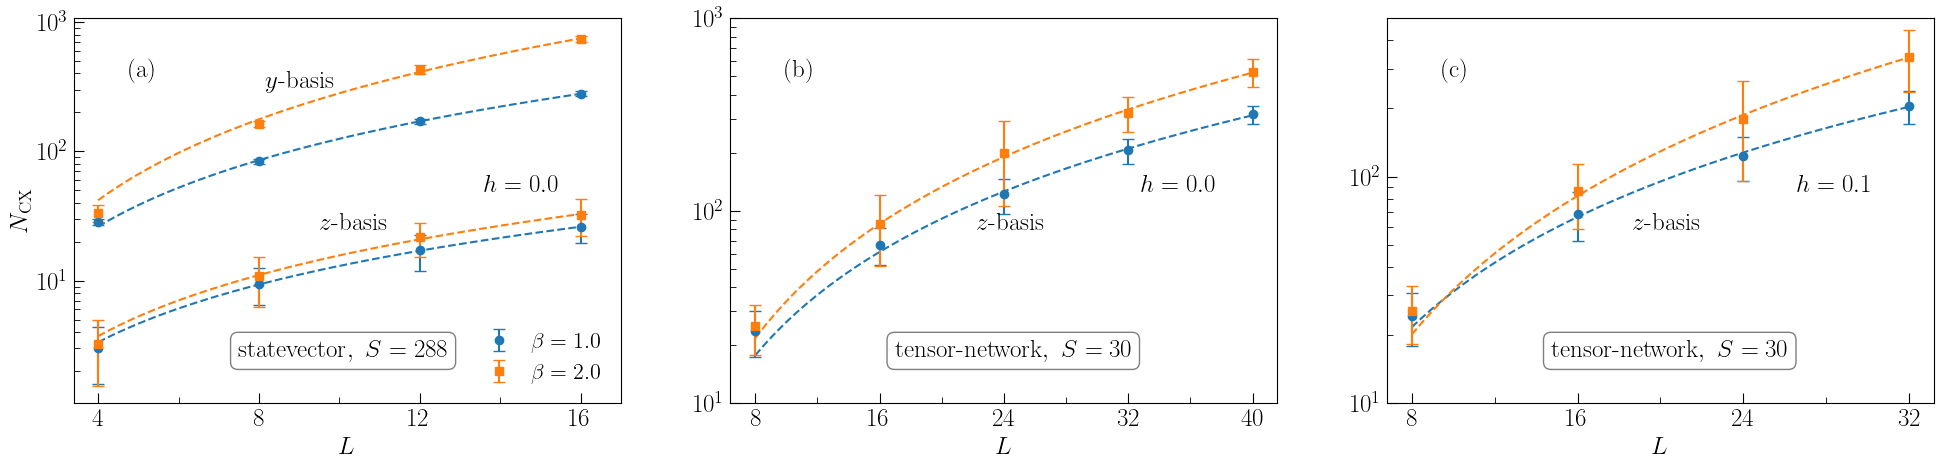

In [6]:
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

fsize, tsize = 18, 16
tdir, major, minor = 'in', 7.5, 4.5
style = 'default'
leg_length = 1.25

plt.style.use(style)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\DeclareMathOperator{\Tr}{Tr}'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['legend.handlelength'] = leg_length
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

xsize, ysize = 8, 5
fig, axs = plt.subplots(1, 3, figsize=(3 * xsize, ysize))

def func(x, a, b):
    return a*x**b

x = [8,16,24,32]
x1 = [4,8,12,16]
x2 = [8,16,24,32,40]
colors = ["#1f77b4", "#ff7f0e"]
c = 0
lst_basis = ["Ybasis", "Zbasis"]
sizes = [i for i in range(5, 21, 4)]
for beta, mrkr in zip(["01", "02"], ["o", "s"]):
    # prop_cycler = iter(plt.rcParams['axes.prop_cycle']) 
    # color = next(prop_cycler)['color']
    # color = next(axs[0]._get_lines.prop_cycler)['color']
    
    basis = lst_basis[0]
    # color = next(axs[0]._get_lines.prop_cycler)['color']
    mean, std = [], []
    for L in sizes:
        tmp = np.loadtxt(f"data/Ncx-L{L}-Ybasis-beta{beta}.dat", usecols=1)
        mean.append(tmp.mean())
        std.append(tmp.std())

    # print(beta, mean[-1])
    axs[0].errorbar(x1, mean, yerr=std, color=colors[c], fmt=mrkr, capsize=4.,
                    label=rf"$\beta={float(beta[-1])}$" if basis[0] == 'Y' else '')

    popt, _ = curve_fit(func, x1, mean)
    print(f"Y, {beta}: {popt}")
    xdata = np.linspace(x1[0], x1[-1], 50)
    axs[0].plot(xdata, func(xdata, *popt), "--", color=colors[c])

    basis = lst_basis[1]
    mean, std = [], []
    for L in sizes:
        tmp = np.loadtxt(f"data/Ncx-L{L}-Zbasis-beta{beta}.dat", usecols=1)
        mean.append(tmp.mean())
        std.append(tmp.std())

    axs[0].errorbar(x1, mean, yerr=std, color=colors[c], fmt=mrkr, capsize=4.,
                    label=rf"$\beta={float(beta[-1])}$" if basis[0] == 'Y' else '')

    popt, _ = curve_fit(func, x1, mean)
    print(f"Z, {beta}: {popt}")
    axs[0].plot(xdata, func(xdata, *popt), "--", color=colors[c])
    
    
    axs[1].errorbar(x2, means["h=0.0", f"tau={float(beta[-1])/2}"], yerr=stds["h=0.0", f"tau={float(beta[-1])/2}"], color=colors[c], fmt=mrkr, capsize=4.,
                    label=rf"$\beta={float(beta[-1])}$")

    popt, _ = curve_fit(func, x2,  means["h=0.0", f"tau={float(beta[-1])/2}"])
    print(f"h=0, {beta}: {popt}")
    xdata = np.linspace(x2[0], x2[-1], 50)
    axs[1].plot(xdata, func(xdata, *popt), "--", color=colors[c])


    axs[2].errorbar(x, means["h=0.1", f"tau={float(beta[-1])/2}"], yerr=stds["h=0.1", f"tau={float(beta[-1])/2}"], color=colors[c], fmt=mrkr, capsize=4.,
                    label=rf"$\beta={float(beta[-1])}$")

    popt, _ = curve_fit(func, x, means["h=0.1", f"tau={float(beta[-1])/2}"])
    print(f"h=0.1, {beta}: {popt}")
    xdata = np.linspace(x[0], x[-1], 50)
    axs[2].plot(xdata, func(xdata, *popt), "--", color=colors[c])
    c += 1

axs[0].set(ylabel=r"$N_\textrm{CX}$")
axs[0].set_xticks(np.arange(4, 21, 4))
axs[1].set_xticks(np.arange(8, 48, 8))
axs[2].set_xticks(np.arange(8, 40, 8))

axs[0].set_xlim(right=17)
axs[1].set_ylim(10,10**3)
axs[2].set_ylim(10,5*10**2)

for i in range(3):
    axs[i].set_yscale("log")
    axs[i].set(xlabel=r"$L$")
    axs[i].xaxis.set_minor_locator(AutoMinorLocator(2))

# Panel labels
axs[0].annotate(r"$\textrm{(a)}$", (0.1, 0.85), xycoords="axes fraction")
axs[1].annotate(r"$\textrm{(b)}$", (0.1, 0.85), xycoords="axes fraction")
axs[2].annotate(r"$\textrm{(c)}$", (0.1, 0.85), xycoords="axes fraction")

axs[0].annotate(r"$y\textrm{-basis}$", (0.35, 0.82), xycoords="axes fraction")
axs[0].annotate(r"$z\textrm{-basis}$", (0.45, 0.45), xycoords="axes fraction")
axs[1].annotate(r"$z\textrm{-basis}$", (0.45, 0.45), xycoords="axes fraction")
axs[2].annotate(r"$z\textrm{-basis}$", (0.45, 0.45), xycoords="axes fraction")
axs[0].annotate(r"$h=0.0$", (0.75, 0.55), xycoords="axes fraction")
# axs[0].annotate(r"$\left\langle N\right\rangle=L/4$", (0.2, 0.7), xycoords="axes fraction")

# axs[1].annotate(r"$z\textrm{-basis}$", (0.47, 0.35), xycoords="axes fraction")
axs[1].annotate(r"$h=0.0$", (0.75, 0.55), xycoords="axes fraction")
axs[2].annotate(r"$h=0.1$", (0.75, 0.55), xycoords="axes fraction")
# axs[1].annotate(r"$\left\langle N\right\rangle=L/4$", (0.2, 0.67), xycoords="axes fraction")
axs[0].annotate(r"$\textrm{statevector},\ S=288$", (0.3, 0.12), xycoords="axes fraction", bbox=dict(boxstyle="round, pad=0.3", fc="white", alpha=0.5))
axs[1].annotate(r"$\textrm{tensor-network},\ S=30$", (0.3, 0.12), xycoords="axes fraction", bbox=dict(boxstyle="round, pad=0.3", fc="white", alpha=0.5))
axs[2].annotate(r"$\textrm{tensor-network},\ S=30$", (0.3, 0.12), xycoords="axes fraction", bbox=dict(boxstyle="round, pad=0.3", fc="white", alpha=0.5))

axs[0].legend(frameon=False, loc="lower right")

plt.savefig(f"plt_ncx_tn.png", dpi=300, pad_inches=.1, bbox_inches="tight")

plt.show()
